In [196]:
#!pip install fredapi

In [197]:
from fredapi import Fred
import yfinance
import pandas as pd

fred = Fred(api_key='9a404e379a8a7946cc7a706aaa30a870')

In [198]:
#!pip install yfinance --upgrade
#!pip install --upgrade yfinance
# import requests

# url = 'https://cloud.iexapis.com/stable/stock/aapl/quote?token=AAPL'
# response = requests.get(url)
# data = response.json()
# print(data)


In [199]:
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "AAPL"

# # Fetch the data
# stock = yf.Ticker(ticker_symbol)

# # Get stock info
# try:
#     stock_info = stock.info
#     pe_ratio = stock_info.get('trailingPE', None)
#     print(f"The P/E Ratio of {ticker_symbol} is: {pe_ratio}")
# except Exception as e:
#     print("Failed to fetch data:", e)


In [200]:
# stock.history()

In [201]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
CPI = fred.get_series('CPIAUCSL', frequency='m')

# Unemployment Rate
UNRATE = fred.get_series('UNRATE', frequency = 'm')

# Personal Consumption Expenditures
PCE = fred.get_series('PCE', frequency = 'm')

# 3-Month Treasury Bill Minus Federal Funds Rate
TB3SMFFM = fred.get_series('TB3SMFFM', frequency = 'm')

# 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity
T10Y3M = fred.get_series('T10Y3M', frequency = 'm')

# Federal Funds Effective Rate
DFF = fred.get_series('DFF', frequency = 'm')

# CBOE Volatility Index: VIX
#VIXCLS = fred.get_series('VIXCLS', frequency = 'm')


In [202]:

df_raw = pd.concat([CPI, UNRATE, PCE, TB3SMFFM, T10Y3M, DFF], axis = 1)
df_raw.columns = ['CPI', 'UNRATE', 'PCE', 'TB3SMFFM', 'T10Y3M', 'DFF']
df_raw

,CPI,UNRATE,PCE,TB3SMFFM,T10Y3M,DFF
1947-01-01,21.480,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-07-01,313.534,4.3,19862.9,-0.13,-1.18,5.33
2024-08-01,314.121,4.2,19918.4,-0.28,-1.42,5.33
2024-09-01,314.686,4.1,20024.3,-0.41,-1.20,5.13
2024-10-01,NaN,4.1,NaN,-0.32,-0.62,4.83


In [203]:
df_chng = df_raw.diff(1)
df_chng.columns = [col + '_CHNG' for col in df_raw.columns]
df_chng

,CPI_CHNG,UNRATE_CHNG,PCE_CHNG,TB3SMFFM_CHNG,T10Y3M_CHNG,DFF_CHNG
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-01,0.140,NaN,NaN,NaN,NaN,NaN
1947-03-01,0.380,NaN,NaN,NaN,NaN,NaN
1947-04-01,0.000,NaN,NaN,NaN,NaN,NaN
1947-05-01,-0.050,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-07-01,0.485,0.2,115.4,-0.04,0.02,0.0
2024-08-01,0.587,-0.1,55.5,-0.15,-0.24,0.0
2024-09-01,0.565,-0.1,105.9,-0.13,0.22,-0.2
2024-10-01,NaN,0.0,NaN,0.09,0.58,-0.3


In [204]:
df_panel = df_raw.merge(df_chng, 
                    left_index = True, 
                    right_index = True, 
                    how = 'left').dropna().drop(['CPI', 'PCE', 'DFF', 'TB3SMFFM', 'T10Y3M'], axis = 1)
df_panel

,UNRATE,CPI_CHNG,UNRATE_CHNG,PCE_CHNG,TB3SMFFM_CHNG,T10Y3M_CHNG,DFF_CHNG
1982-02-01,8.9,0.300,0.3,24.1,-0.36,-1.53,1.56
1982-03-01,9.0,0.000,0.1,2.9,-0.70,0.40,-0.10
1982-04-01,9.3,0.300,0.3,2.2,-0.24,-0.02,0.26
1982-05-01,9.4,0.900,0.1,18.2,-0.12,0.38,-0.49
1982-06-01,9.6,1.100,0.2,3.6,0.68,0.31,-0.30
...,...,...,...,...,...,...,...
2024-05-01,4.0,0.018,0.1,94.0,0.01,-0.07,0.00
2024-06-01,4.1,-0.176,0.1,50.2,-0.01,-0.23,0.00
2024-07-01,4.3,0.485,0.2,115.4,-0.04,0.02,0.00
2024-08-01,4.2,0.587,-0.1,55.5,-0.15,-0.24,0.00


In [205]:
sp500 = yfinance.download('^GSPC', start = '1900-01-01', end = '2024-12-31')
sp500_monthly = sp500['Adj Close'].resample('M').last().pct_change()
sp500_monthly.index = sp500_monthly.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
# Drop the NaN values that result from pct_change()
sp500_monthly.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
<ipython-input-205-943e1389b322>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [206]:
IXIC = yfinance.download('^IXIC', start = '1900-01-01', end = '2024-12-31')
IXIC_monthly = IXIC['Adj Close'].resample('M').last().pct_change()
IXIC_monthly.index = IXIC_monthly.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
# Drop the NaN values that result from pct_change()
IXIC_monthly.dropna(inplace=True)
IXIC_monthly

[*********************100%***********************]  1 of 1 completed
<ipython-input-206-956ddacf9abe>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^IXIC
Date,
1971-03-01,0.045688
1971-04-01,0.059734
1971-05-01,-0.036064
1971-06-01,-0.004157
1971-07-01,-0.023469
...,...
2024-07-01,-0.007512
2024-08-01,0.006490
2024-09-01,0.026847


In [207]:
sp500_lag1 = sp500_monthly.shift(1)
sp500_lag2 = sp500_monthly.shift(2)
sp500_lag3 = sp500_monthly.shift(3)
sp500_lag6 = sp500_monthly.shift(6)

In [208]:
df_ts = pd.concat([sp500_monthly, 
                   #IXIC_monthly,
                   sp500_lag1, 
                   sp500_lag2,
                   sp500_lag3, 
                   sp500_lag6
                  ], 
                  axis = 1)
df_ts.columns = ['SP500', 
                 #'IXIC',
                 'SP500_LAG1', 
                 'SP500_LAG2',
                 'SP500_LAG3', 
                 'SP500_LAG6'
                ]
df_ts = df_ts.dropna()

In [209]:
df = df_panel.merge(df_ts, left_index = True, right_index = True, how = 'left')

In [210]:
df

,UNRATE,CPI_CHNG,UNRATE_CHNG,PCE_CHNG,TB3SMFFM_CHNG,T10Y3M_CHNG,DFF_CHNG,SP500,SP500_LAG1,SP500_LAG2,SP500_LAG3,SP500_LAG6
1982-02-01,8.9,0.300,0.3,24.1,-0.36,-1.53,1.56,-0.060548,-0.017544,-0.030075,0.036590,-0.062099
1982-03-01,9.0,0.000,0.1,2.9,-0.70,0.40,-0.10,-0.010167,-0.060548,-0.017544,-0.030075,-0.053832
1982-04-01,9.3,0.300,0.3,2.2,-0.24,-0.02,0.26,0.040014,-0.010167,-0.060548,-0.017544,0.049148
1982-05-01,9.4,0.900,0.1,18.2,-0.12,0.38,-0.49,-0.039162,0.040014,-0.010167,-0.060548,0.036590
1982-06-01,9.6,1.100,0.2,3.6,0.68,0.31,-0.30,-0.020290,-0.039162,0.040014,-0.010167,-0.030075
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,4.0,0.018,0.1,94.0,0.01,-0.07,0.00,0.048021,-0.041615,0.031019,0.051721,0.089179
2024-06-01,4.1,-0.176,0.1,50.2,-0.01,-0.23,0.00,0.034670,0.048021,-0.041615,0.031019,0.044229
2024-07-01,4.3,0.485,0.2,115.4,-0.04,0.02,0.00,0.011321,0.034670,0.048021,-0.041615,0.015896
2024-08-01,4.2,0.587,-0.1,55.5,-0.15,-0.24,0.00,0.022835,0.011321,0.034670,0.048021,0.051721


In [211]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

 <p style="font-size: 20px; font-weight: bold;">Part 2: Standardized Indicators.</b>

Assign weights to the standardized indicators

 <p style="font-size: 20px; font-weight: bold;">Part 3: K Means to Cluster 4 Market Regime.</b>

In [212]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.cluster import KMedoids

In [213]:
def cap_and_floor(df, alpha = 0.05):
    """
    Cap values at the 95th percentile and floor values at the 5th percentile for each column in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to be modified.

    Returns:
    pd.DataFrame: A DataFrame with values capped and floored at the specified quantiles.
    """
    # Calculate the 5th and 95th percentiles for each column
    quantiles = df.quantile([alpha, 1-alpha])
    
    # Define a function to cap and floor the values
    def apply_quantile_cap_floor(column):
        lower_quantile = quantiles.loc[alpha, column.name]
        upper_quantile = quantiles.loc[1-alpha, column.name]
        # Apply the cap and floor
        column = column.clip(lower=lower_quantile, upper=upper_quantile)
        return column
    
    # Apply the function to each column
    capped_floored_df = df.apply(apply_quantile_cap_floor)
    return capped_floored_df

In [214]:
from sklearn.cluster import KMeans
num_feature = 5

In [215]:
import pandas as pd
import numpy as np

# For generating some data
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt

from sklearn.mixture import BayesianGaussianMixture, GaussianMixture


In [216]:
# # Apply K-means to the weighted PCA data
# clustering = KMeans(
#     n_clusters=4,
#     random_state=42,
# )  # Adjust the number of clusters and random_state as necessary

In [276]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

# Example: Suppose you have a dataset with 3 features and you want 4 clusters.
n_components = 4
n_features = 3

# Example prior means for each cluster (shape should be (n_components, n_features))
# These are the priors for the cluster centers.
means_prior = np.array([
    [5.0, 10.0, 15.0],   # Prior mean for cluster 1
    [20.0, 25.0, 30.0],  # Prior mean for cluster 2
    [35.0, 40.0, 45.0],  # Prior mean for cluster 3
    [50.0, 55.0, 60.0]   # Prior mean for cluster 4
])

# Example precision for the prior means (can also be an array with shape (n_features,))
mean_precision_prior = 0.8  # Assuming the same precision for all features

# Setup the BayesianGaussianMixture with the specified priors
clustering = BayesianGaussianMixture(
    n_components=n_components,
    covariance_type='full',  # Choose based on your data structure ('full', 'tied', 'diag', 'spherical')
    weight_concentration_prior_type='dirichlet_distribution',
    means_prior=means_prior,
    mean_precision_prior=mean_precision_prior,
    max_iter=1000,
    n_init=10
)

# Fit the model (assuming X is your dataset)
# clustering.fit(X)


TypeError: __init__() got an unexpected keyword argument 'means_prior'

In [443]:
# Assuming 'data' is your DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

df_prew = pd.DataFrame(data_scaled, columns = df.columns, index = df.index)

df_prew.loc[:,df_panel.columns] = df_prew.loc[:,df_panel.columns]*(1/df_panel.shape[1])

df_prew['SP500_LAG1'] = df_prew['SP500_LAG1']*np.exp(-1/12)
df_prew['SP500_LAG2'] = df_prew['SP500_LAG2']*np.exp(-2/12)
df_prew['SP500_LAG3'] = df_prew['SP500_LAG3']*np.exp(-3/12)
df_prew['SP500_LAG6'] = df_prew['SP500_LAG6']*np.exp(-6/12)
df_prew.describe()

clustering = BayesianGaussianMixture(n_components=4, 
                                     n_init = 4,
                                     weight_concentration_prior = 0.02,
                                    )

clustering1 = GaussianMixture(n_components=4,
                                tol=0.001, 
                                reg_covar=1e-06, 
                                max_iter=100, 
                                 n_init=4, 
                                 init_params='kmeans', 
                                weights_init=[0.15, 0.25, 0.3, 0.3], 
                                means_init=pd.concat([
                                            df_prew.loc['2008-06-01':'2009-01-01'].mean(),
                                            df_prew.loc['2009-01-01':'2009-06-01'].mean(),
                                            df_prew.loc['2013-01-01':'2014-01-01'].mean(),
                                df_prew.loc['2007-01-01':'2008-01-01'].mean()], 
                                    axis = 1).T, 
                                precisions_init=None, 
                                random_state=None, 
                                warm_start=False)

clustering = KMeans(n_clusters=4, 
                    init=np.array(pd.concat([
    df_prew.loc['2008-06-01':'2009-01-01'].mean(),
    df_prew.loc['2009-01-01':'2010-01-01'].mean(),
    df_prew.loc['2013-01-01':'2014-01-01'].mean(),
    df_prew.loc['2007-01-01':'2008-01-01'].mean()], axis = 1).T))

clustering = KMedoids(n_clusters=4, 
#                     init=np.array(pd.concat([
#     df_prew.loc['2008-06-01':'2009-01-01'].mean(),
#     df_prew.loc['2009-01-01':'2010-01-01'].mean(),
#     df_prew.loc['2013-01-01':'2014-01-01'].mean(),
#     df_prew.loc['2007-01-01':'2008-01-01'].mean()], axis = 1).T)
                     )

clusters = clustering.fit_predict(df_prew)
df_prew['cluster'] = clusters

In [444]:
# clustering.fit(df_prew)

In [445]:
# pd.concat([
#     df_prew.loc['2007-01-01':'2008-01-01'].mean(),
#     df_prew.loc['2008-01-01':'2009-01-01'].mean(),
#     df_prew.loc['2009-01-01':'2010-01-01'].mean(),
#     df_prew.loc['2013-01-01':'2014-01-01'].mean()
# ], axis = 1).T

In [446]:
# df_prew.loc['2007-01-01':'2008-01-01'].mean()

In [447]:
# df_prew.loc['2008-01-01':'2009-01-01'].mean()

In [448]:
# df_prew.loc['2009-01-01':'2010-01-01'].mean()

In [449]:
# df_prew.loc['2013-01-01':'2014-01-01'].mean()

In [450]:
# np.array(df_prew.loc[['2008-10-01', '2009-12-01', '2013-03-01', '2015-03-01']])

In [457]:
clustering.cluster_centers_

array([[ 0.04671863, -0.10654873,  0.03025812, -0.02628392, -0.14187819,
         0.03409179,  0.05710692,  0.54767683,  0.0339026 , -0.41170667,
         0.19508213, -0.18704906],
       [ 0.00753131,  0.01727428,  0.00244455, -0.02913422,  0.14845607,
        -0.00227279,  0.0139262 ,  0.52455911, -0.74192676,  0.07776998,
         0.05523248,  0.33545232],
       [-0.06300586,  0.04203888,  0.00244455,  0.05550721, -0.10040186,
        -0.10097663,  0.09489005, -0.65549062, -0.58051823,  0.20360619,
        -0.59971998,  0.08010506],
       [-0.12570558, -0.13478038, -0.05318259,  0.02018831,  0.07379869,
        -0.08019688,  0.07869728, -0.20451124,  0.60411019,  0.18389798,
         0.17387668, -0.13051956]])

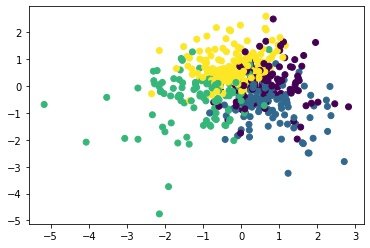

In [451]:
plt.scatter(df_prew['SP500'], df_prew['SP500_LAG1'], c = df_prew['cluster'])

In [452]:
sp500_idx = sp500.resample('M').last()
sp500_idx.index = sp500_idx.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
sp500_idx
df_prew['SP500_IDX'] = sp500_idx['Adj Close']

<ipython-input-452-5c8bea257737>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [458]:
def triangular_kernel_smoothed_values(series, bandwidth=7):
    n = len(series)
    smoothed_values = np.zeros(n)
    half_bandwidth = bandwidth // 2

    for i in range(n):
        # Determine the window range, handling boundaries
        start = max(0, i - half_bandwidth)
        end = min(n, i + half_bandwidth + 1)

        # Compute the kernel weights
        # The center of the window has the highest weight
        window_length = end - start
        center = i - start  # This adjusts the center to be the middle of the current window
        weights = np.array([1 - abs(center - x) / half_bandwidth for x in range(window_length)])
        weights /= weights.sum()  # Normalize the weights
        #print(i, weights)
        # Calculate the weighted mean of the values in the window
        smoothed_values[i] = np.average(series[start:end], weights=weights)

    return smoothed_values


In [497]:
proba = pd.get_dummies(df_prew[['cluster']], columns=['cluster'])
proba.columns = [0,1,2,3]
proba = proba.apply(lambda col: triangular_kernel_smoothed_values(col, bandwidth=9))
proba['cluster'] = proba.idxmax(axis = 1)

proba = pd.get_dummies(proba[['cluster']], columns=['cluster'])
proba.columns = [0,1,2,3]
proba = proba.apply(lambda col: triangular_kernel_smoothed_values(col, bandwidth=9))
proba['cluster'] = proba.idxmax(axis = 1)

In [498]:

proba

,0,1,2,3,cluster
1982-02-01,0.000000,0.0,1.000000,0.0000,2
1982-03-01,0.000000,0.0,1.000000,0.0000,2
1982-04-01,0.066667,0.0,0.933333,0.0000,2
1982-05-01,0.187500,0.0,0.812500,0.0000,2
1982-06-01,0.312500,0.0,0.625000,0.0625,2
...,...,...,...,...,...
2024-05-01,0.000000,0.0,0.000000,1.0000,3
2024-06-01,0.000000,0.0,0.000000,1.0000,3
2024-07-01,0.000000,0.0,0.000000,1.0000,3
2024-08-01,0.000000,0.0,0.000000,1.0000,3


In [499]:
df_prew['cluster'] = proba['cluster']

In [500]:
import plotly.express as px
fig = px.scatter(df_prew, 
                 x=df_prew.index, 
                 y=df_prew['SP500'], 
                 color = 'cluster')

# Customize the plot
#fig.update_traces(textposition='top center', textfont_size=10)

# Set axis labels and plot title
fig.update_layout(xaxis_title='Time', 
                  yaxis_title='SP500', 
                  title='Scatter Plot of SP500')

# Show the plot
fig.show()

In [501]:
import plotly.express as px
fig = px.scatter(df_prew, 
                 x=df_prew.index, 
                 y=df_prew['SP500_IDX'], 
                 color = 'cluster')

# Customize the plot
#fig.update_traces(textposition='top center', textfont_size=10)

# Set axis labels and plot title
fig.update_layout(xaxis_title='Time', 
                  yaxis_title='SP500', 
                  title='Scatter Plot of SP500')

# Show the plot
fig.show()

 <p style="font-size: 20px; font-weight: bold;">Part 5: Detect Each Assets Performence under 4 Market Regime.</b>

In [564]:
sp500_10 = yfinance.download('^SP500-20', start = '1900-01-01', end = '2024-12-31')

sp500_10 = yfinance.download('^SP500-20', start = '1900-01-01', end = '2024-12-31')
sp500_10_monthly = sp500_10['Adj Close'].resample('M').last().pct_change()
sp500_10_monthly.index = sp500_10_monthly.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
# Drop the NaN values that result from pct_change()
sp500_10_monthly.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-564-f9c0b3c3db4f>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [565]:
sp500_10_monthly

Ticker,^SP500-20
Date,
1993-06-01,0.006200
1993-07-01,0.007291
1993-08-01,0.033745
1993-09-01,-0.017850
1993-10-01,0.010142
...,...
2024-07-01,0.048432
2024-08-01,0.026656
2024-09-01,0.032662


In [566]:
def get_monthly(sp):
    sp = sp['Adj Close'].resample('M').last().pct_change()
    sp.index = sp.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
    # Drop the NaN values that result from pct_change()
    sp.dropna(inplace=True)
    return sp

The Global Industry Classification Standard (GICS) is an industry taxonomy developed in 1999 by MSCI and Standard & Poor's (S&P) for use by the global financial community. The GICS structure consists of 11 sectors, 25 industry groups, 74 industries and 163 sub-industries into which S&P has categorized all major public companies. The system is similar to ICB (Industry Classification Benchmark), a classification structure maintained by FTSE Group.

In [567]:
# Energy
sp500_10 = yfinance.download('^GSPE', start = '1900-01-01', end = '2024-12-31')
sp500_10_mon = get_monthly(sp500_10)

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [568]:
sp500_15 = yfinance.download('^SP500-15', start = '1900-01-01', end = '2024-12-31')
sp500_15_mon = get_monthly(sp500_15)
sp500_15_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-15
Date,
1993-06-01,-0.027341
1993-07-01,0.002789
1993-08-01,0.023471
1993-09-01,-0.042604
1993-10-01,0.039505
...,...
2024-07-01,0.043145
2024-08-01,0.022187
2024-09-01,0.024116


In [569]:
sp500_20 = yfinance.download('^SP500-20', start = '1900-01-01', end = '2024-12-31')
sp500_20_mon = get_monthly(sp500_20)
sp500_20_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-20
Date,
1993-06-01,0.006200
1993-07-01,0.007291
1993-08-01,0.033745
1993-09-01,-0.017850
1993-10-01,0.010142
...,...
2024-07-01,0.048432
2024-08-01,0.026656
2024-09-01,0.032662


In [570]:
sp500_25 = yfinance.download('^SP500-25', start = '1900-01-01', end = '2024-12-31')
sp500_25_mon = get_monthly(sp500_25)
sp500_25_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-25
Date,
1993-06-01,-0.023726
1993-07-01,0.014201
1993-08-01,0.029287
1993-09-01,-0.006610
1993-10-01,0.073488
...,...
2024-07-01,0.016379
2024-08-01,-0.010827
2024-09-01,0.070159


In [571]:
sp500_30 = yfinance.download('^SP500-30', start = '1900-01-01', end = '2024-12-31')
sp500_30_mon = get_monthly(sp500_30)
sp500_30_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-30
Date,
1993-06-01,-0.003353
1993-07-01,-0.035995
1993-08-01,0.036408
1993-09-01,-0.026150
1993-10-01,0.068111
...,...
2024-07-01,0.017686
2024-08-01,0.057817
2024-09-01,0.005869


In [572]:
sp500_35 = yfinance.download('^SP500-35', start = '1900-01-01', end = '2024-12-31')
sp500_35_mon = get_monthly(sp500_35)
sp500_35_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-35
Date,
1993-06-01,-0.037196
1993-07-01,-0.077037
1993-08-01,0.037523
1993-09-01,-0.011339
1993-10-01,0.054811
...,...
2024-07-01,0.024901
2024-08-01,0.049946
2024-09-01,-0.018161


In [573]:
sp500_40 = yfinance.download('^SP500-40', start = '1900-01-01', end = '2024-12-31')
sp500_40_mon = get_monthly(sp500_40)
sp500_40_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-40
Date,
1993-06-01,0.048919
1993-07-01,0.017867
1993-08-01,0.024395
1993-09-01,0.016784
1993-10-01,-0.059286
...,...
2024-07-01,0.063148
2024-08-01,0.043631
2024-09-01,-0.006652


In [574]:
sp500_45 = yfinance.download('^SP500-45', start = '1900-01-01', end = '2024-12-31')
sp500_45_mon = get_monthly(sp500_45)
sp500_45_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-45
Date,
1993-06-01,-0.025546
1993-07-01,-0.061084
1993-08-01,0.076850
1993-09-01,0.003902
1993-10-01,0.025702
...,...
2024-07-01,-0.021193
2024-08-01,0.011631
2024-09-01,0.024476


In [575]:
sp500_50 = yfinance.download('^SP500-50', start = '1900-01-01', end = '2024-12-31')
sp500_50_mon = get_monthly(sp500_50)
sp500_50_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-50
Date,
1993-06-01,0.049917
1993-07-01,0.013006
1993-08-01,0.039126
1993-09-01,-0.017616
1993-10-01,0.001530
...,...
2024-07-01,-0.041587
2024-08-01,0.012311
2024-09-01,0.045356


In [576]:
sp500_55 = yfinance.download('^SP500-55', start = '1900-01-01', end = '2024-12-31')
sp500_55_mon = get_monthly(sp500_55)
sp500_55_mon

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Ticker,^SP500-55
Date,
1993-06-01,0.030410
1993-07-01,0.019303
1993-08-01,0.033414
1993-09-01,-0.013554
1993-10-01,-0.023029
...,...
2024-07-01,0.067306
2024-08-01,0.042934
2024-09-01,0.064253


In [577]:
sp500_60 = yfinance.download('^SP500-60', start = '1900-01-01', end = '2024-12-31')
sp500_60_mon = get_monthly(sp500_60)

# S&P CoreLogic Case-Shiller U.S. National Home Price Index
pre_SP500_REITS = pd.DataFrame(fred.get_series('CSUSHPINSA', frequency='m'), columns=sp500_60_mon.columns)
sp500_60_mon = sp500_60_mon.combine_first(pre_SP500_REITS.pct_change())
sp500_60_mon = sp500_60_mon.loc[sp500_60_mon.index >= pd.to_datetime('1993-06-01')]

[*********************100%***********************]  1 of 1 completed
<ipython-input-566-c2fd6daa4680>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [578]:
df_sec = pd.concat([sp500_10_mon, # Energy
           sp500_15_mon, # Materials
           sp500_20_mon, # Industrials
           sp500_25_mon, # Consumer Discretionary
           sp500_30_mon, # Consumer Staples
           sp500_35_mon, # Health Care
           sp500_40_mon, # Financials
           sp500_45_mon, # Information Technology
           sp500_50_mon, # Communication Services
           sp500_55_mon, # Utilities
           sp500_60_mon, # Real Estate
          ], axis = 1)
df_sec.columns = [
    'Energy', 
    'Materials', 
    'Industrials', 
    'Consumer Discretionary', 
    'Consumer Staples', 
    'Health Care', 
    'Financials',
    'Information Technology',
    'Communication Services',
    'Utilities',
    'Real Estate']
df_sec

,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate
1993-06-01,-0.010604,-0.027341,0.006200,-0.023726,-0.003353,-0.037196,0.048919,-0.025546,0.049917,0.030410,0.006309
1993-07-01,0.008948,0.002789,0.007291,0.014201,-0.035995,-0.077037,0.017867,-0.061084,0.013006,0.019303,0.004760
1993-08-01,0.032063,0.023471,0.033745,0.029287,0.036408,0.037523,0.024395,0.076850,0.039126,0.033414,0.003159
1993-09-01,0.007460,-0.042604,-0.017850,-0.006610,-0.026150,-0.011339,0.016784,0.003902,-0.017616,-0.013554,0.000858
1993-10-01,-0.008154,0.039505,0.010142,0.073488,0.068111,0.054811,-0.059286,0.025702,0.001530,-0.023029,-0.000332
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,0.020323,0.043145,0.048432,0.016379,0.017686,0.024901,0.063148,-0.021193,-0.041587,0.067306,0.066140
2024-08-01,-0.023245,0.022187,0.026656,-0.010827,0.057817,0.049946,0.043631,0.011631,0.012311,0.042934,0.059707
2024-09-01,-0.027865,0.024116,0.032662,0.070159,0.005869,-0.018161,-0.006652,0.024476,0.045356,0.064253,0.027512
2024-10-01,0.007066,-0.035478,-0.013923,-0.015678,-0.029377,-0.047304,0.025525,-0.010030,0.017959,-0.010676,-0.037115


In [579]:
df_corr = df_sec.corr()

In [580]:
df_sec.mean()

Energy                    0.007306
Materials                 0.006628
Industrials               0.008012
Consumer Discretionary    0.008880
Consumer Staples          0.006658
Health Care               0.008722
Financials                0.007402
Information Technology    0.013216
Communication Services    0.004491
Utilities                 0.004121
Real Estate               0.005346
dtype: float64

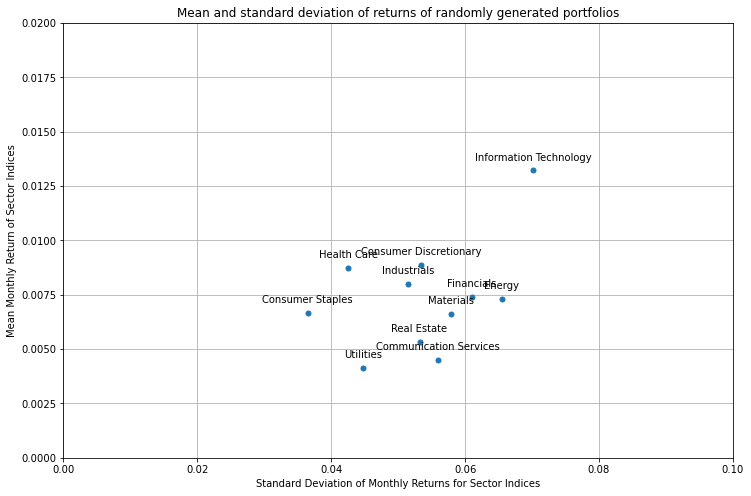

In [581]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 8))
plt.plot(list(df_sec.std()), list(df_sec.mean()), 'o', markersize=5)
plt.xlim([0, 0.1])
plt.ylim([0, 0.02])
plt.grid()
plt.xlabel('Standard Deviation of Monthly Returns for Sector Indices')
plt.ylabel('Mean Monthly Return of Sector Indices')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')


for sector in df_sec.columns:
    plt.annotate(sector,
                 (df_sec.std()[sector], df_sec.mean()[sector]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate=0):
    """
    Calculate the portfolio's returns, volatility, and Sharpe Ratio.
    """
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (returns - risk_free_rate) / volatility if volatility > 0 else 0
    return returns, volatility, sharpe_ratio

def minimize_volatility(weights, mean_returns, cov_matrix):
    """
    Returns portfolio volatility for minimization.
    """
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

def find_max_sharpe_ratio_portfolio(mean_returns, cov_matrix, risk_free_rate=0):
    """
    Find portfolio that maximizes the Sharpe Ratio.
    """
    num_assets = len(mean_returns)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets,]
    
    options = {'disp': False}
    result = minimize(lambda x: -portfolio_performance(x, mean_returns, cov_matrix, risk_free_rate)[2],
                      initial_guess, method='SLSQP', bounds=bounds, constraints=constraints, options=options)
    return result.x

def find_min_volatility_portfolio(mean_returns, cov_matrix):
    """
    Find portfolio that minimizes volatility.
    """
    num_assets = len(mean_returns)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets,]

    options = {'disp': False}
    result = minimize(lambda x: minimize_volatility(x, mean_returns, cov_matrix),
                      initial_guess, method='SLSQP', bounds=bounds, constraints=constraints, options=options)
    return result.x

def plot_efficient_frontier_with_points(df_returns, risk_free_rate=0.01):
    """
    Plot the Efficient Frontier including points for min volatility and max Sharpe Ratio.
    """
    mean_returns = df_returns.mean()
    cov_matrix = df_returns.cov()

    # Find portfolios on the frontier
    efficient_portfolios = []
    target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 100)
    for ret in target_returns:
        constraints = (
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - ret}
        )
        bounds = tuple((0, 1) for _ in mean_returns)
        result = minimize(minimize_volatility, len(mean_returns) * [1. / len(mean_returns)],
                          args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
        efficient_portfolios.append(portfolio_performance(result.x, mean_returns, cov_matrix))
    
    efficient_portfolios = np.array(efficient_portfolios)

    # Optimal portfolios
    weights_sharpe = find_max_sharpe_ratio_portfolio(mean_returns, cov_matrix, risk_free_rate)
    weights_vol = find_min_volatility_portfolio(mean_returns, cov_matrix)
    max_sharpe = portfolio_performance(weights_sharpe, mean_returns, cov_matrix, risk_free_rate)
    min_vol = portfolio_performance(weights_vol, mean_returns, cov_matrix)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(efficient_portfolios[:, 1], efficient_portfolios[:, 0], c='blue', label='Efficient Frontier')
    plt.scatter(max_sharpe[1], max_sharpe[0], color='red', marker='*', s=200, label='Max Sharpe Ratio (SR={:.2f})'.format(max_sharpe[2]))
    plt.scatter(min_vol[1], min_vol[0], color='green', marker='o', s=200, label='Min Volatility')
    
    plt.plot(list(df_returns.std()), list(df_returns.mean()), 'o', markersize=5)
    plt.xlim([0, np.round(max(df_returns.std())+0.025,2)])
    plt.ylim([min(0, min(df_returns.mean())), np.round(max(df_returns.mean())+0.0025,2)])
    plt.grid()
    plt.xlabel('Standard Deviation of Monthly Returns for Sector Indices')
    plt.ylabel('Mean Monthly Return of Sector Indices')
    plt.title('Mean and standard deviation of returns of randomly generated portfolios')


    for sector in df_returns.columns:
        plt.annotate(sector,
                     (df_returns.std()[sector], df_returns.mean()[sector]),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')

    plt.title('Efficient Frontier with Key Portfolios')
    plt.xlabel('Expected Return')
    plt.ylabel('Volatility')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    return weights_sharpe, weights_vol

In [583]:
np.round(0.09,1)

0.1

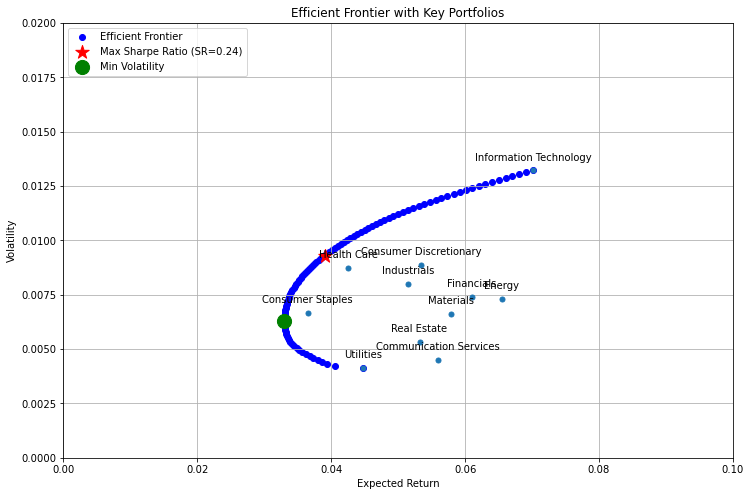

In [584]:
# Plot the Efficient Frontier
weights_max_sharpe, weights_min_vol = plot_efficient_frontier_with_points(df_sec, risk_free_rate=0.00)

In [585]:
df_sec_weights = pd.DataFrame([weights_max_sharpe, weights_min_vol]).T
df_sec_weights.columns = ['Max Sharpe', 'Min Volatility']
df_sec_weights.index = df_sec.columns
df_sec_weights['Mean Returns'] = df_sec.mean()
df_sec_weights['Std Dev'] = df_sec.std()
df_sec_weights

,Max Sharpe,Min Volatility,Mean Returns,Std Dev
Energy,1.038120e-02,2.366640e-02,0.007306,0.065500
Materials,0.000000e+00,3.415237e-18,0.006628,0.057936
Industrials,0.000000e+00,1.084202e-18,0.008012,0.051511
Consumer Discretionary,0.000000e+00,3.252607e-18,0.008880,0.053488
Consumer Staples,3.068064e-01,4.544476e-01,0.006658,0.036495
Health Care,4.093047e-01,1.424663e-01,0.008722,0.042521
Financials,6.288373e-17,0.000000e+00,0.007402,0.061054
Information Technology,2.735077e-01,2.117708e-02,0.013216,0.070201
Communication Services,5.128276e-17,6.226591e-02,0.004491,0.055951
Utilities,0.000000e+00,2.263939e-01,0.004121,0.044738


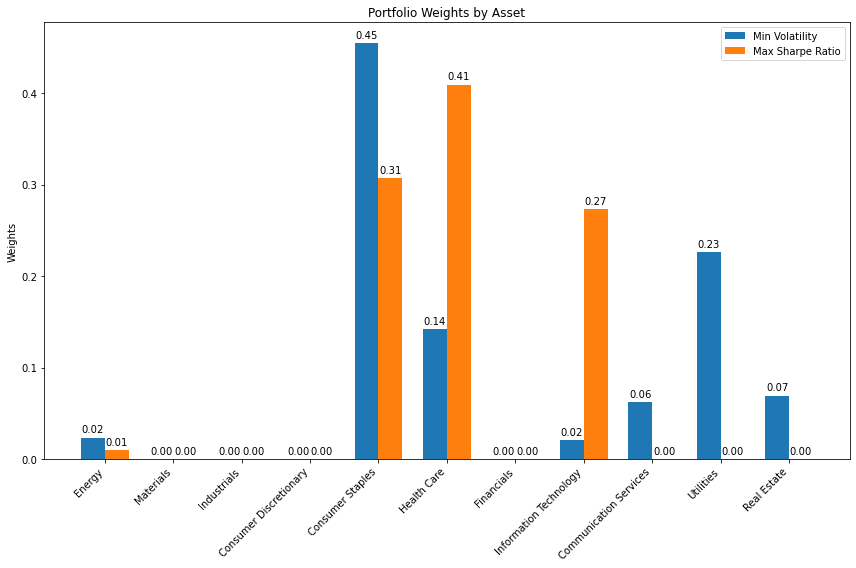

In [586]:
import matplotlib.pyplot as plt

def plot_portfolio_weights(df_returns, weights_max_sharpe, weights_min_vol):
    # Labels from DataFrame column names
    labels = df_returns.columns
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars
    
    fig, ax = plt.subplots(figsize = (12, 8))
    rects1 = ax.bar(x - width/2, weights_min_vol, width, label='Min Volatility')
    rects2 = ax.bar(x + width/2, weights_max_sharpe, width, label='Max Sharpe Ratio')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Weights')
    ax.set_title('Portfolio Weights by Asset')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate labels and align them
    ax.legend()

    # Attach a text label above each bar, displaying its height
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# Assuming df_returns and weights are already defined
plot_portfolio_weights(df_sec, weights_max_sharpe, weights_min_vol)


# Optimization for different market regimes

In [587]:
df_sec_ext = df_sec.merge(df_prew, left_index = True, right_index = True, how = 'left')

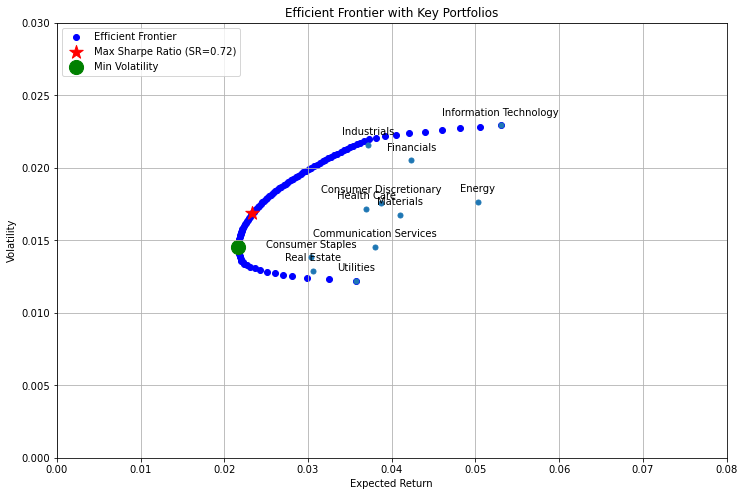

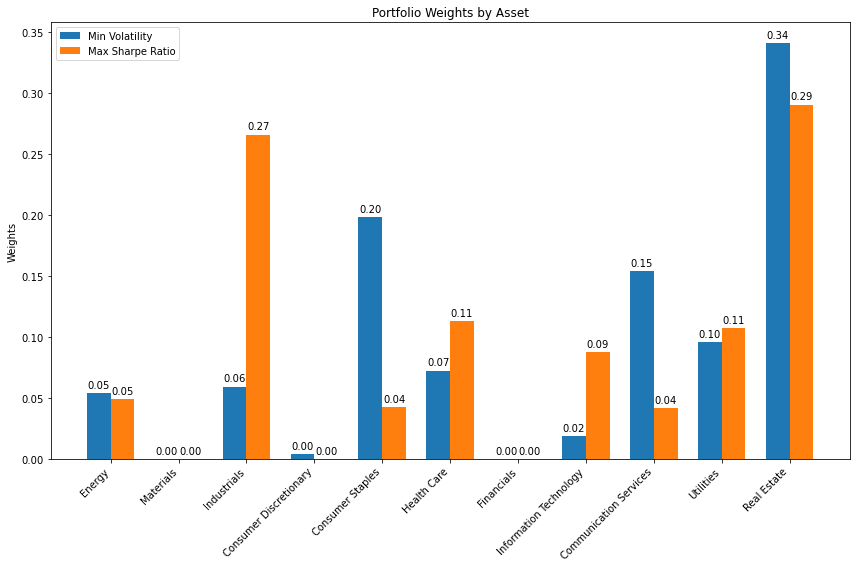

In [588]:
df_sec_0 = df_sec_ext[df_sec_ext['cluster'] == 0]
# Plot the Efficient Frontier
weights_max_sharpe_0, weights_min_vol_0 = plot_efficient_frontier_with_points(df_sec_0[df_sec.columns], risk_free_rate=0.00)
# Assuming df_returns and weights are already defined
plot_portfolio_weights(df_sec_0[df_sec.columns], weights_max_sharpe_0, weights_min_vol_0)

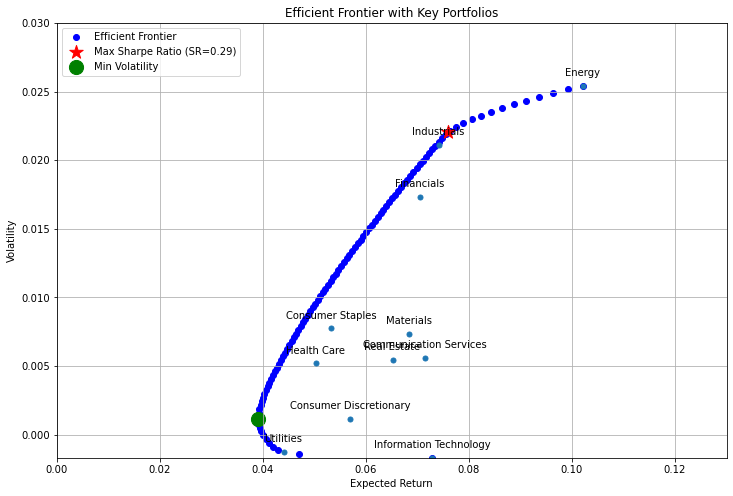

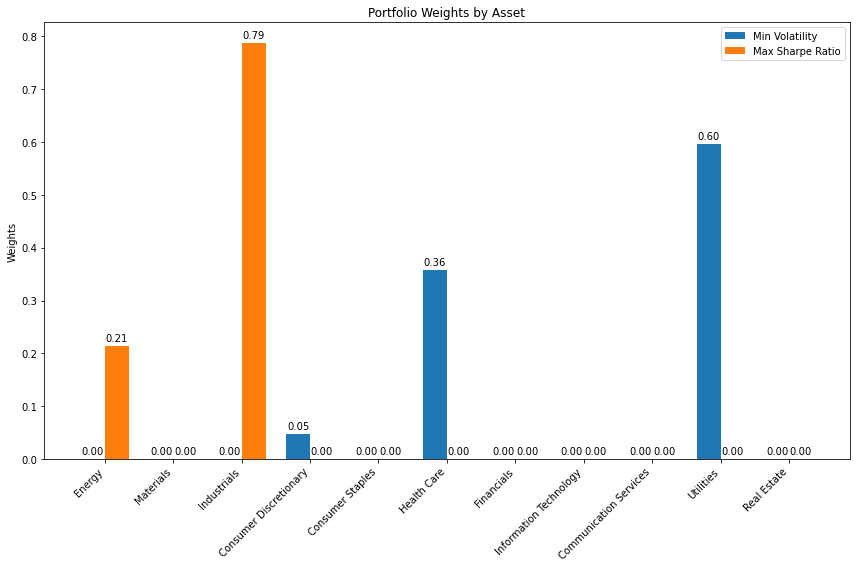

In [589]:
df_sec_1 = df_sec_ext[df_sec_ext['cluster'] == 1]
# Plot the Efficient Frontier
weights_max_sharpe_1, weights_min_vol_1 = plot_efficient_frontier_with_points(df_sec_1[df_sec.columns], risk_free_rate=0.00)
# Assuming df_returns and weights are already defined
plot_portfolio_weights(df_sec_1[df_sec.columns], weights_max_sharpe_1, weights_min_vol_1)

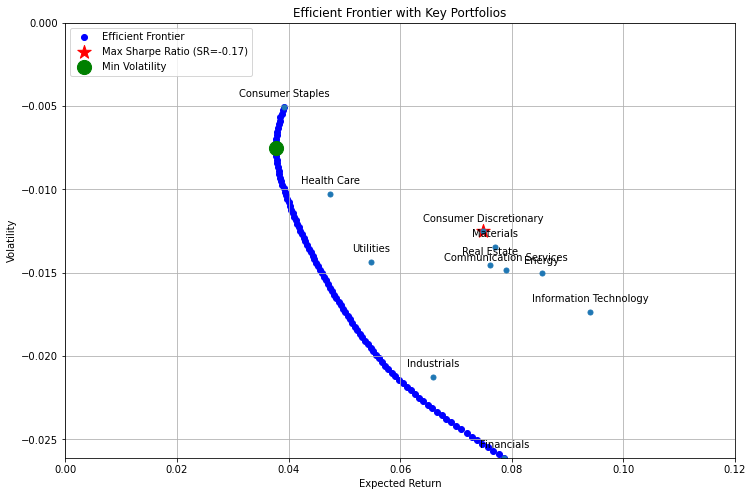

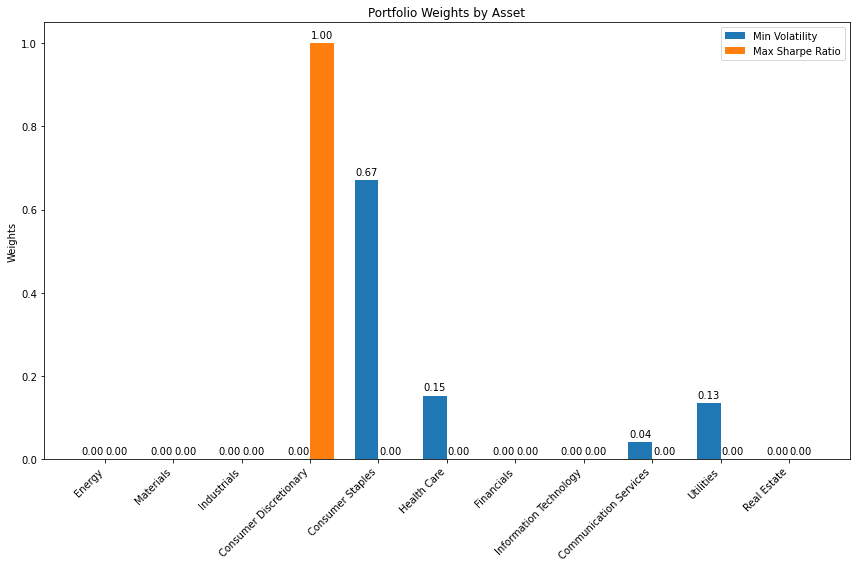

In [590]:
df_sec_2 = df_sec_ext[df_sec_ext['cluster'] == 2]
# Plot the Efficient Frontier
weights_max_sharpe_2, weights_min_vol_2 = plot_efficient_frontier_with_points(df_sec_2[df_sec.columns], risk_free_rate=0.00)
# Assuming df_returns and weights are already defined
plot_portfolio_weights(df_sec_2[df_sec.columns], weights_max_sharpe_2, weights_min_vol_2)

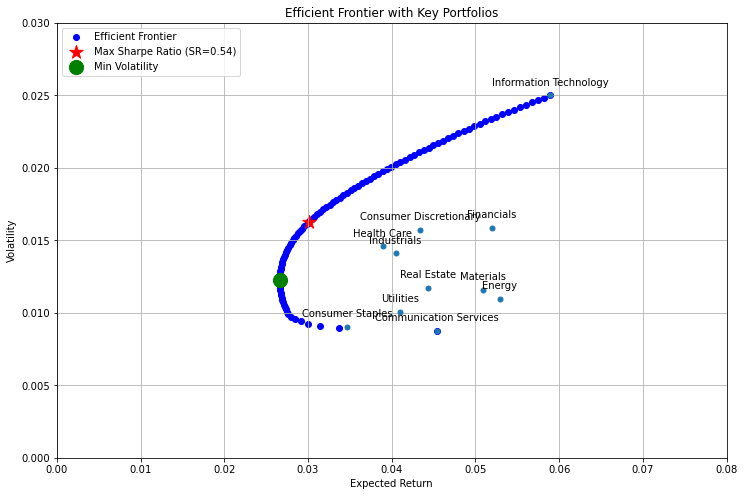

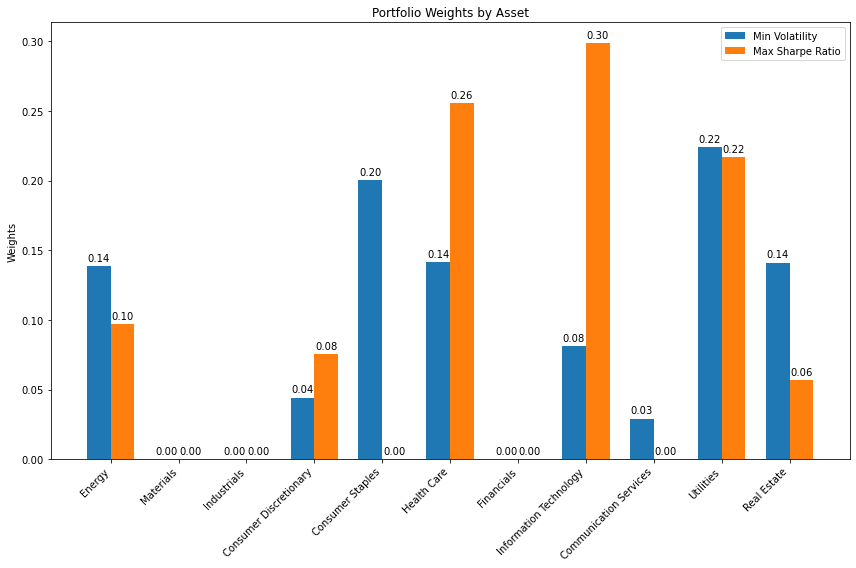

In [591]:
df_sec_3 = df_sec_ext[df_sec_ext['cluster'] == 3]
# Plot the Efficient Frontier
weights_max_sharpe_3, weights_min_vol_3 = plot_efficient_frontier_with_points(df_sec_3[df_sec.columns], risk_free_rate=0.00)
# Assuming df_returns and weights are already defined
plot_portfolio_weights(df_sec_3[df_sec.columns], weights_max_sharpe_3, weights_min_vol_3)

In [649]:
df_max_sharpe_weights = pd.DataFrame([weights_max_sharpe_0, 
                           weights_max_sharpe_1, 
                           weights_max_sharpe_2, 
                           weights_max_sharpe_3, 
                           weights_max_sharpe], 
             columns = df_sec.columns)
df_max_sharpe_weights

,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate
0,0.049282,0.0,2.661915e-01,0.000000e+00,4.241580e-02,1.135468e-01,1.292911e-17,8.798756e-02,4.219030e-02,1.075487e-01,2.908369e-01
1,0.213575,0.0,7.864245e-01,1.517883e-18,1.441989e-16,0.000000e+00,0.000000e+00,9.367507e-17,6.722053e-17,0.000000e+00,2.667137e-17
2,0.000000,0.0,2.575170e-16,1.000000e+00,0.000000e+00,8.329783e-17,6.392965e-17,8.683993e-17,5.159660e-16,2.267569e-17,3.567271e-16
3,0.097218,0.0,4.067113e-17,7.527936e-02,1.036091e-17,2.554055e-01,1.083525e-17,2.986603e-01,3.750662e-17,2.166452e-01,5.679111e-02
4,0.010381,0.0,0.000000e+00,0.000000e+00,3.068064e-01,4.093047e-01,6.288373e-17,2.735077e-01,5.128276e-17,0.000000e+00,2.471981e-17


In [650]:
df_min_vol_weights = pd.DataFrame([weights_min_vol_0, 
                           weights_min_vol_1, 
                           weights_min_vol_2, 
                           weights_min_vol_3, 
                           weights_min_vol], 
             columns = df_sec.columns)
df_min_vol_weights

,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate
0,5.402489e-02,4.336809e-18,5.955156e-02,4.038595e-03,0.198795,0.072595,0.000000e+00,0.019246,1.544379e-01,0.096171,3.411399e-01
1,0.000000e+00,0.000000e+00,0.000000e+00,4.786923e-02,0.000000,0.357063,0.000000e+00,0.000000,3.700262e-17,0.595068,5.467256e-17
2,3.149486e-17,0.000000e+00,1.007147e-18,8.729687e-18,0.670620,0.153100,0.000000e+00,0.000000,4.202174e-02,0.134258,1.088811e-17
3,1.388651e-01,0.000000e+00,5.116079e-19,4.425475e-02,0.200221,0.141253,1.063873e-18,0.080992,2.917334e-02,0.224025,1.412153e-01
4,2.366640e-02,3.415237e-18,1.084202e-18,3.252607e-18,0.454448,0.142466,0.000000e+00,0.021177,6.226591e-02,0.226394,6.958273e-02


In [651]:
df_regime_return = pd.DataFrame(index = df_sec.index, 
                                columns = ['Max_Sharpe_Regime_Return', 
                                           'Max_Sharpe_Return',
                                           'Min_Vol_Regime_Return', 
                                           'Min_Vol_Return', 
                                          ])
df_regime_return['Max_Sharpe_Return'] = (df_sec*df_max_sharpe_weights.loc[4]).sum(axis = 1)
df_regime_return['Min_Vol_Return'] = (df_sec*df_min_vol_weights.loc[4]).sum(axis = 1)
for i in range(4):
    df_regime_return.loc[df_sec[df_sec_ext['cluster'] == i].index, 'Max_Sharpe_Regime_Return'] = (df_sec[df_sec_ext['cluster'] == i]*df_max_sharpe_weights.loc[i]).sum(axis = 1)
    df_regime_return.loc[df_sec[df_sec_ext['cluster'] == i].index, 'Min_Vol_Regime_Return'] = (df_sec[df_sec_ext['cluster'] == i]*df_min_vol_weights.loc[i]).sum(axis = 1)

In [652]:
df_regime_return['cluster'] = df_sec_ext['cluster']

In [653]:
df_regime_return = df_regime_return.fillna(0)

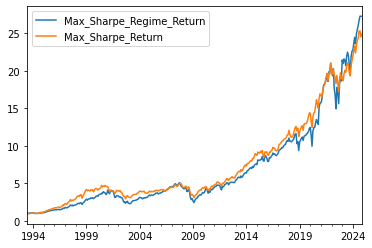

In [655]:
(df_regime_return[['Max_Sharpe_Regime_Return', 'Max_Sharpe_Return']] + 1).cumprod().plot()

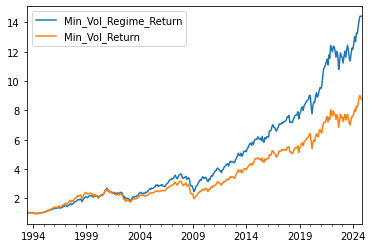

In [656]:
(df_regime_return[['Min_Vol_Regime_Return', 'Min_Vol_Return']] + 1).cumprod().plot()

In [668]:
import plotly.express as px
import plotly.graph_objects as go  # Import graph_objects

# Create a color map from the unique clusters
color_map = px.colors.qualitative.Plotly  # Using Plotly's qualitative color scheme


fig = px.scatter(df_regime_return, 
                 x=df_regime_return.index, 
                 y=df_regime_return['Max_Sharpe_Regime_Return'], 
                 color = 'cluster',
                )

# Customize the plot
#fig.update_traces(textposition='top center', textfont_size=10)

# Set axis labels and plot title
fig.update_layout(xaxis_title='Time', 
                  yaxis_title='SP500', 
                  title='Scatter Plot of SP500')

# Add a line plot for another column
fig.add_trace(
    go.Scatter(x=df_regime_return.index, 
               y=df_regime_return['Max_Sharpe_Return'], 
               mode='markers',  # Use lines for a line plot
               marker=dict(symbol='triangle-up', 
                           size=5, 
                           color=df_regime_return['cluster']),
               name='Non_Regime_Return',
              )  # Name for the legend
)

# Show the plot
fig.show()

In [669]:
import plotly.express as px
import plotly.graph_objects as go  # Import graph_objects

# Create a color map from the unique clusters
color_map = px.colors.qualitative.Plotly  # Using Plotly's qualitative color scheme


fig = px.scatter(df_regime_return, 
                 x=df_regime_return.index, 
                 y=df_regime_return['Min_Vol_Regime_Return'], 
                 color = 'cluster',
                )

# Customize the plot
#fig.update_traces(textposition='top center', textfont_size=10)



# Add a line plot for another column
fig.add_trace(
    go.Scatter(x=df_regime_return.index, 
               y=df_regime_return['Min_Vol_Return'], 
               mode='markers',  # Use lines for a line plot
               marker=dict(symbol='triangle-up', 
                           size=5, 
                           color=df_regime_return['cluster']),
               name='Non_Regime_Return',
              )  # Name for the legend
)
# Set axis labels and plot title
fig.update_layout(xaxis_title='Time', 
                  yaxis_title='SP500', 
                  title='Scatter Plot of SP500')
# Show the plot
fig.show()